# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Draft project title if you have one (can be changed later)

# Names

- Nini Pham

<a id='research_question'></a>
# Research Question

How do the most common baby names vary across different ethnicities or cultural backgrounds over the past decade?



# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
names_df = pd.read_csv('https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD')
names_df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [3]:
names_shape = names_df.shape
names_shape

(57582, 6)

In [4]:
null_rows = names_df[names_df.isnull().any(axis=1)] 

names_df.isnull().any(axis=1).sum()

0

In [5]:
names_df.isnull().any()

Year of Birth         False
Gender                False
Ethnicity             False
Child's First Name    False
Count                 False
Rank                  False
dtype: bool

In [6]:
names_df['Year of Birth'] = names_df['Year of Birth'].astype(int) 

In [7]:
names_df.describe

<bound method NDFrame.describe of        Year of Birth  Gender           Ethnicity Child's First Name  Count  \
0               2011  FEMALE            HISPANIC          GERALDINE     13   
1               2011  FEMALE            HISPANIC                GIA     21   
2               2011  FEMALE            HISPANIC             GIANNA     49   
3               2011  FEMALE            HISPANIC            GISELLE     38   
4               2011  FEMALE            HISPANIC              GRACE     36   
...              ...     ...                 ...                ...    ...   
57577           2014    MALE  WHITE NON HISPANIC             Yousef     18   
57578           2014    MALE  WHITE NON HISPANIC            Youssef     24   
57579           2014    MALE  WHITE NON HISPANIC              Yusuf     16   
57580           2014    MALE  WHITE NON HISPANIC            Zachary     90   
57581           2014    MALE  WHITE NON HISPANIC                Zev     49   

       Rank  
0        75  
1

In [8]:
start_year = names_df['Year of Birth'].max()
start_year


2019

In [9]:
end_year = names_df['Year of Birth'].min()
end_year

2011

In [10]:
ethnicities = names_df['Ethnicity'].unique()
ethnicities

array(['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER',
       'BLACK NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

In [11]:
names_df.rename(columns=lambda x: x.replace("Child's First Name", "First Name"), inplace=True)

In [12]:
names_df['First Name'] = names_df['First Name'].str.lower()

In [13]:
grouped_data = names_df.groupby(['Ethnicity', 'Year of Birth', 'First Name'])['Count'].sum().reset_index()
grouped_data

,Ethnicity,Year of Birth,First Name,Count
0,ASIAN AND PACI,2012,aarav,60
1,ASIAN AND PACI,2012,aaron,330
2,ASIAN AND PACI,2012,aayan,78
3,ASIAN AND PACI,2012,abby,66
4,ASIAN AND PACI,2012,abdul,96
...,...,...,...,...
17907,WHITE NON HISPANIC,2019,zelda,13
17908,WHITE NON HISPANIC,2019,zev,55
17909,WHITE NON HISPANIC,2019,zissy,21
17910,WHITE NON HISPANIC,2019,zoe,93


In [14]:
grouped_data.sort_values(['Ethnicity', 'Year of Birth', 'Count'], ascending=[True, True, False], inplace=True)
grouped_data

,Ethnicity,Year of Birth,First Name,Count
295,ASIAN AND PACI,2012,ryan,1182
133,ASIAN AND PACI,2012,ethan,1122
90,ASIAN AND PACI,2012,chloe,1032
181,ASIAN AND PACI,2012,jayden,935
313,ASIAN AND PACI,2012,sophia,864
...,...,...,...,...
17848,WHITE NON HISPANIC,2019,tristan,10
17861,WHITE NON HISPANIC,2019,viktor,10
17866,WHITE NON HISPANIC,2019,walter,10
17868,WHITE NON HISPANIC,2019,weston,10


In [15]:
grouped_data.head()

,Ethnicity,Year of Birth,First Name,Count
295,ASIAN AND PACI,2012,ryan,1182
133,ASIAN AND PACI,2012,ethan,1122
90,ASIAN AND PACI,2012,chloe,1032
181,ASIAN AND PACI,2012,jayden,935
313,ASIAN AND PACI,2012,sophia,864


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [16]:
most_popular_names = grouped_data.groupby(['Ethnicity','Year of Birth']).apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

In [17]:
most_popular_names.sort_values('Year of Birth', inplace=True)

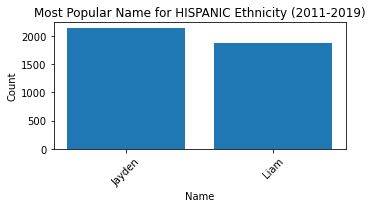

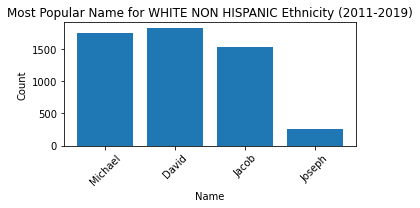

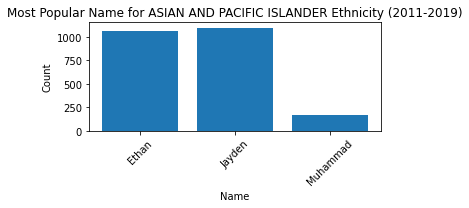

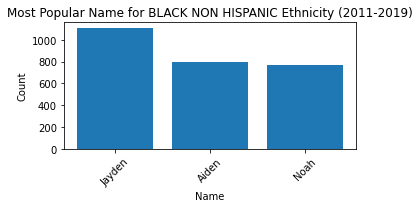

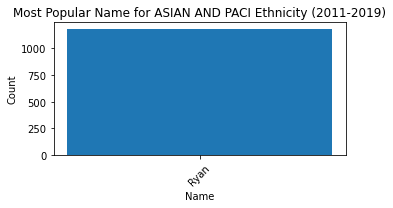

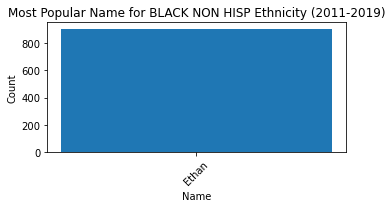

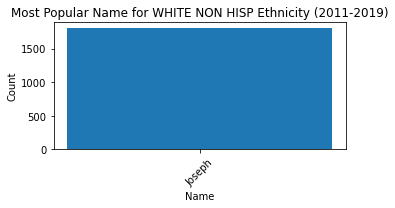

In [18]:
def most_popular_names(df, ethnicity_to_plot, start_year, end_year):
    filtered_df = df[(df['Ethnicity'] == ethnicity_to_plot) & (df['Year of Birth'].between(start_year, end_year))]
    filtered_df = filtered_df.copy()
    filtered_df.loc[:, 'First Name'] = filtered_df['First Name'].str.title()
    grouped_data = filtered_df.groupby(['Year of Birth', 'First Name'])['Count'].sum().reset_index()
    most_popular_names = grouped_data.groupby('Year of Birth').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)
    
    
    plt.figure(figsize=(5, 3))
    plt.bar(most_popular_names['First Name'], most_popular_names['Count'])
    plt.xlabel('Name')
    plt.ylabel('Count')
    plt.title(f'Most Popular Name for {ethnicity_to_plot} Ethnicity ({start_year}-{end_year})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

ethnicities_to_plot = ['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER',
       'BLACK NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP']

start_year = 2011
end_year = 2019

for ethnicity in ethnicities_to_plot:
    most_popular_names(names_df, ethnicity, start_year, end_year)